In [1]:
import cobra
from cobra.io.mat import *
import warnings
warnings.simplefilter('ignore')
#from cobra.sampling import sample
from cobra.sampling import OptGPSampler, ACHRSampler
import os
cpus = os.cpu_count()
from cobra.io.json import load_json_model
#model = load_matlab_model("./COBRA_models/GEM_Recon2_thermocurated_redHUMAN.mat")
#from acevedo_clss_and_fcns import * 
model                                 = load_json_model("./COBRA_models/GEM_Recon2_thermocurated_redHUMAN.json")
co    = model.problem.Constraint(model.reactions.biomass.flux_expression, lb=.05 * model.optimize().objective_value)
model.add_cons_vars([co])
print("init sampler")


Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
init sampler


In [2]:
model.reactions.get_by_id('r0399').bounds  = (1e-5, 50)
model.reactions.get_by_id('PHETHPTOX2').bounds = (1e-5, 50)
model.reactions.get_by_id('r0403').bounds = (1e-5, 50)
model.reactions.get_by_id('DHPR').bounds  = (1e-5, 50)
model.reactions.get_by_id('DHPR2').bounds  = (1e-5, 50)
model.reactions.get_by_id('r0398').bounds  = (1e-5, 50)
optgp = OptGPSampler(model, processes=cpus, thinning=100)

In [3]:
samples = optgp.sample(10_000)


In [5]:


samples.to_parquet("./results/data/flux_samples/flux_samples_v2_10_000.parquet.gzip", compression='gzip')  

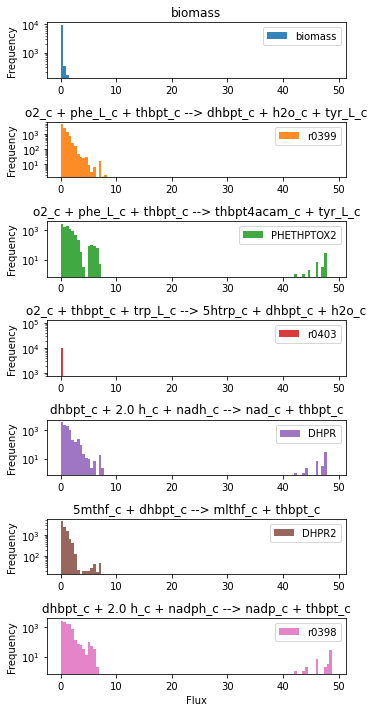

In [6]:
import matplotlib.pyplot as plt

rxn_list = ['biomass', 'r0399', 'PHETHPTOX2', 'r0403', 'DHPR', 'DHPR2', 'r0398']


formulas =  [model.reactions.get_by_id(r).reaction if r != 'biomass' else 'biomass' for r in rxn_list]


#fig, axes = plt.subplots(nrows=4, ncols=4)

samples[rxn_list].plot.hist(bins=100, alpha=0.9, figsize=(5,10), subplots=True, sharey=False, 
                      sharex=False, logy = True, title = formulas, ylabel = ['', '', ''], grid=False)
plt.xlabel('Flux') 
#plt.ylabel(None)
#plt.ylabel("common Y")
#fig.supylabel('common y label')
plt.tight_layout()
plt.show()

# ---------------------END------------------------------------

In [2]:






def sample_fluxes(model,file_path,n_samples, Sampler, if_pku: bool=False):
        if if_pku:
            bounds_blocked   = (0, 0)
            model.reactions.get_by_id('r0399').bounds = bounds_blocked
        else:
            bounds_unblocked = (0, 100)
            model.reactions.get_by_id('r0399').bounds = bounds_unblocked

        model.reactions.get_by_id('PHETHPTOX2').bounds = (0, 0)
        model.reactions.get_by_id('r0403').bounds = (0, 100)
        model.reactions.get_by_id('DHPR').bounds  = (0, 100)
        model.reactions.get_by_id('DHPR2').bounds  = (0, 100)
        model.reactions.get_by_id('r0398').bounds  = (0, 100)

        samples = Sampler.sample(n_samples)
        samples.to_parquet(file_path, compression='gzip')  
    

#sample_fluxes(model, "./results/data/flux_samples/flux_samples_CONTROL.parquet.gzip",
#              False, 10,  Sampler = optgp)
sample_fluxes(model, "./results/data/flux_samples/flux_samples_v2.parquet.gzip",
              n_samples = 10,  Sampler = optgp)

KeyboardInterrupt: 

In [ ]:
#flux_samples_CONTROL    = pd.read_parquet( "./results/data/flux_samples/flux_samples_CONTROL.parquet.gzip")
flux_samples_PKU        = pd.read_parquet( "./results/data/flux_samples/flux_samples_PKU.parquet.gzip")




In [3]:

rxn_list = ['biomass', 'r0399', 'PHETHPTOX2', 'r0403', 'DHPR', 'DHPR2', 'r0398']


formulas =  [model.reactions.get_by_id(r).reaction if r != 'biomass' else 'biomass' for r in rxn_list]
import matplotlib.pyplot as plt


#fig, axes = plt.subplots(nrows=4, ncols=4)
s[rxn_list].plot.hist(bins=100, alpha=0.9, figsize=(5,10), subplots=True, sharey=False, 
                      sharex=False, logy = True, title = formulas, ylabel = ['', '', ''], grid=False)
plt.xlabel('Flux') 
#plt.ylabel(None)
#plt.ylabel("common Y")
#fig.supylabel('common y label')
plt.tight_layout()
plt.show()

In [89]:
from cobra.io import save_json_model
assert model.genes.__len__() > 0
s.to_parquet("results/data/flux_samples.parquet.gzip", compression='gzip')
save_json_model(model, "models/GEM_Recon2_thermocurated_redHUMAN.json")